In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [184]:
Disney = pd.read_csv(r'C:\Users\Santhosh\Desktop\DIS_final.csv')
Disney.head()

,Date,Open,High,Low,Close,Volume
0,10/20/2023,82.90,83.44,82.61,82.65,"10,436,990"
1,10/19/2023,85.26,85.27,83.17,83.25,"14,316,810"
2,10/18/2023,85.69,86.26,84.60,84.68,"10,047,020"
3,10/17/2023,85.35,86.29,85.31,86.20,"9,985,651"
4,10/16/2023,84.31,85.93,84.31,85.71,"10,275,140"


In [185]:
Disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
Date      252 non-null object
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null object
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [186]:
Disney['Date'] = pd.to_datetime(Disney['Date'])

In [187]:
print(f'Dataframe contains stock prices between {Disney.Date.min()} {Disney.Date.max()}') 
print(f'Total days = {(Disney.Date.max()  - Disney.Date.min()).days} days')

Dataframe contains stock prices between 2022-10-20 00:00:00 2023-10-20 00:00:00
Total days = 365 days


In [188]:
Disney.describe()

,Open,High,Low,Close
count,252.000000,252.000000,252.000000,252.000000
mean,93.370952,94.355913,92.250317,93.318730
std,7.848330,8.039945,7.615864,7.895107
min,79.100000,79.790000,78.730000,79.320000
25%,86.795000,87.955000,85.982500,86.810000
50%,92.510000,93.195000,91.320000,92.525000
75%,99.442500,100.465000,98.157500,99.572500
max,118.040000,118.180000,110.370000,113.210000


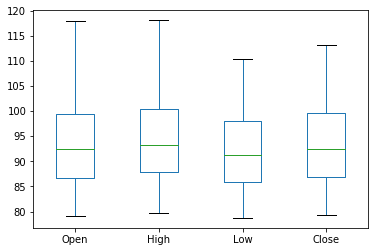

In [189]:
Disney[['Open','High','Low','Close','Volume']].plot(kind='box')

In [190]:
layout = go.Layout(
    title='Stock Prices of Disney',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

Disney_data = [{'x':Disney['Date'], 'y':Disney['Close']}]
plot = go.Figure(data=Disney_data, layout=layout)

In [191]:
iplot(plot)

In [192]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [193]:
#Split the data into train and test sets
X = np.array(Disney.index).reshape(-1,1)
Y = Disney['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [194]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
Disney_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=Disney_data, layout=layout)

In [198]:
iplot(plot2)

In [199]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.46016226879383737	0.4969197410330968
MSE       33.84688331012853	30.501904063896017

